<a href="https://colab.research.google.com/github/ReshmaDG/Main-project/blob/main/ML_Main_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Car Price Prediction

###  This project that aims to build a machine learning model to predict the true value of used cars using attributes like make, model, year, mileage. The project uses a dataset of used car prices to train a regression model in Python with libraries like Scikit-learn, Pandas and Matplotlib. The model could help determine the actual price of a used car based on its features.


###columns:

- Id - Unique id of car
- Price - Price of the car
- Levy - Govt tax for the car
- Manufacturer - Manufacturing company of the car.
- Model - Car model type.
- prod.year - In which year of car was build.
- Category - Type of the car
- Leather interior - Leather interior are not.
- Fuel type - Which type of fuel car.
- Engine volume - Engine used/type.
- Mileage -  Total distance the car has been driven
- Cylinders - Cylinders refers to the number of engine cylinders in a car
- Gear box type - Indicates the type of transmission system the vehicle uses which affects how the car shifts gears while driving.
- Drive wheels - Indicates which wheels receive power from the engine, affecting traction, handling, and performance.
- Doors - How many doors in the car.
- Wheel - Typically refers to the position of the steering wheel — that is, whether the vehicle is left-hand drive or right-hand drive.
- Color - Color of the car.
- Airbags - Represents the total number of airbags installed in a vehicle.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ReshmaDG/Dataset/refs/heads/main/carprice%20prediction.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
df.shape

(19237, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
df['Levy'].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

In [ ]:
df['Levy'].value_counts()['-']

np.int64(5819)

In [ ]:
#replace the '-' into Nan
df['Levy'] = df['Levy'].replace('-', np.nan)

#datatype change into integer
df['Levy'] = pd.to_numeric(df['Levy'])

In [ ]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [ ]:
#Removing the 'Turbo' and trim the space
df['Engine volume'] = df['Engine volume'].str.replace('Turbo', '', regex=False).str.strip()

In [ ]:
#Changing the datatype as 'float'
df['Engine volume'] = df['Engine volume'].astype(float)

In [ ]:
df['Engine volume'].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [ ]:
df['Mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [ ]:
#Removing the'km' from the mileage and keep as int type

df['Mileage'] = df['Mileage'].str.replace('km', '', regex=False).str.strip()
df['Mileage'] = df['Mileage'].astype(int)

In [ ]:
df['Mileage'].unique()

array([186005, 192000, 200000, ..., 140607, 307325, 186923])

In [ ]:
df['Gear box type'].unique()

array(['Automatic', 'Tiptronic', 'Variator', 'Manual'], dtype=object)

In [ ]:
df['Drive wheels'].unique()

array(['4x4', 'Front', 'Rear'], dtype=object)

In [ ]:
#Replace 4x4 as Four_wheel_drive

df['Drive wheels'] = df['Drive wheels'].replace('4x4', 'Four_wheel_drive')

In [ ]:
df['Drive wheels'].unique()

array(['Four_wheel_drive', 'Front', 'Rear'], dtype=object)

In [ ]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [ ]:
#Replacing the 'doors' values and make it correct

df['Doors'] = df['Doors'].map({'04-May':4,'02-Mar':2, '>5':6}).astype(int)

In [ ]:
df['Doors'].unique()

array([4, 2, 6])

In [ ]:
#correcting the 'Wheel' column values also

df['Wheel'].unique()

array(['Left wheel', 'Right-hand drive'], dtype=object)

In [ ]:
df['Wheel'] = df['Wheel'].map({'Left wheel':'Left_hand_drive', 'Right-hand drive':'Right_hand_drive'})
df['Wheel'].unique()

array(['Left_hand_drive', 'Right_hand_drive'], dtype=object)

In [ ]:
df['Color'].unique()

array(['Silver', 'Black', 'White', 'Grey', 'Blue', 'Green', 'Red',
       'Sky blue', 'Orange', 'Yellow', 'Brown', 'Golden', 'Beige',
       'Carnelian red', 'Purple', 'Pink'], dtype=object)

In [ ]:
df['Airbags'].unique()

array([12,  8,  2,  0,  4,  6, 10,  3,  1, 16,  5,  7,  9, 11, 14, 15, 13])

In [ ]:
categorical_col = df.select_dtypes('O').columns.to_list()
categorical_col

['Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Gear box type',
 'Drive wheels',
 'Wheel',
 'Color']

In [ ]:
numerical_col = df.select_dtypes(exclude='O').columns.to_list()
numerical_col

['ID',
 'Price',
 'Levy',
 'Prod. year',
 'Engine volume',
 'Mileage',
 'Cylinders',
 'Doors',
 'Airbags']

In [ ]:
df[numerical_col].isna().sum()

,0
ID,0
Price,0
Levy,5819
Prod. year,0
Engine volume,0
Mileage,0
Cylinders,0
Doors,0
Airbags,0


###Imputing the missing values using KNN Imputer

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

#scaling the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_col])

#imputing the scaled numerical data
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(scaled_data)

#inverse the scaling
df[numerical_col] = scaler.inverse_transform(imputed_data)

In [ ]:
df.isna().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [ ]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [ ]:
df['Model'].nunique()

1590

In [ ]:
correlation = df.select_dtypes(include='number').corr()['Price'].sort_values(ascending=False)
print(correlation)

Price            1.000000
Prod. year       0.012982
Engine volume    0.008753
Cylinders        0.007518
Levy             0.002595
ID              -0.000844
Mileage         -0.001758
Airbags         -0.012824
Doors           -0.030869
Name: Price, dtype: float64


In [ ]:
df.describe().round(2)

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags
count,19237.00,19237.00,19237.00,19237.00,19237.00,1.923700e+04,19237.00,19237.00,19237.00
mean,45576535.89,18555.93,1117.94,2010.91,2.31,1.532236e+06,4.58,3.93,6.58
std,936591.42,190581.27,738.15,5.67,0.88,4.840387e+07,1.20,0.43,4.32
min,20746880.00,1.00,87.00,1939.00,0.00,0.000000e+00,1.00,2.00,0.00
25%,45698374.00,5331.00,687.00,2009.00,1.80,7.013900e+04,4.00,4.00,4.00
50%,45772308.00,13172.00,891.00,2012.00,2.00,1.260000e+05,4.00,4.00,6.00
75%,45802036.00,22075.00,1324.00,2015.00,2.50,1.888880e+05,4.00,4.00,12.00
max,45816654.00,26307500.00,11714.00,2020.00,20.00,2.147484e+09,16.00,6.00,16.00


## Exploratory Data Analysis (EDA):

###Distribution of Price

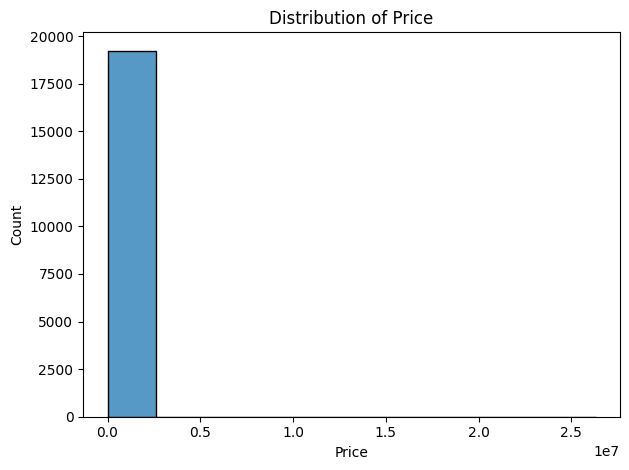

In [ ]:
sns.histplot(data=df, x=df['Price'], bins=10)
plt.title('Distribution of Price')
plt.tight_layout()
plt.show()

# df['Price'].hist(bins=50)
# plt.show()

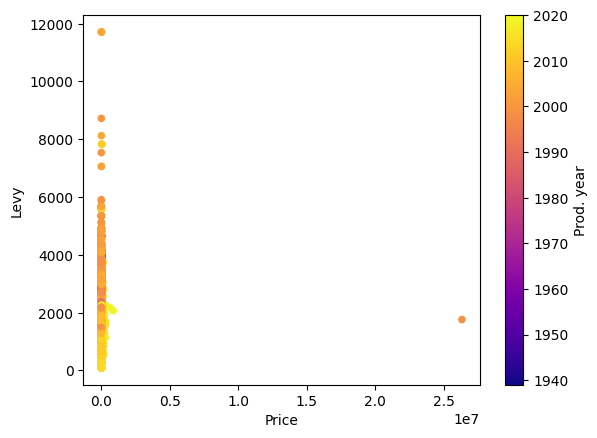

In [ ]:
df.plot.scatter(x='Price', y='Levy', c='Prod. year', cmap='plasma', colorbar=True )
plt.show()

###Distribution of numerical columns before removing skewness

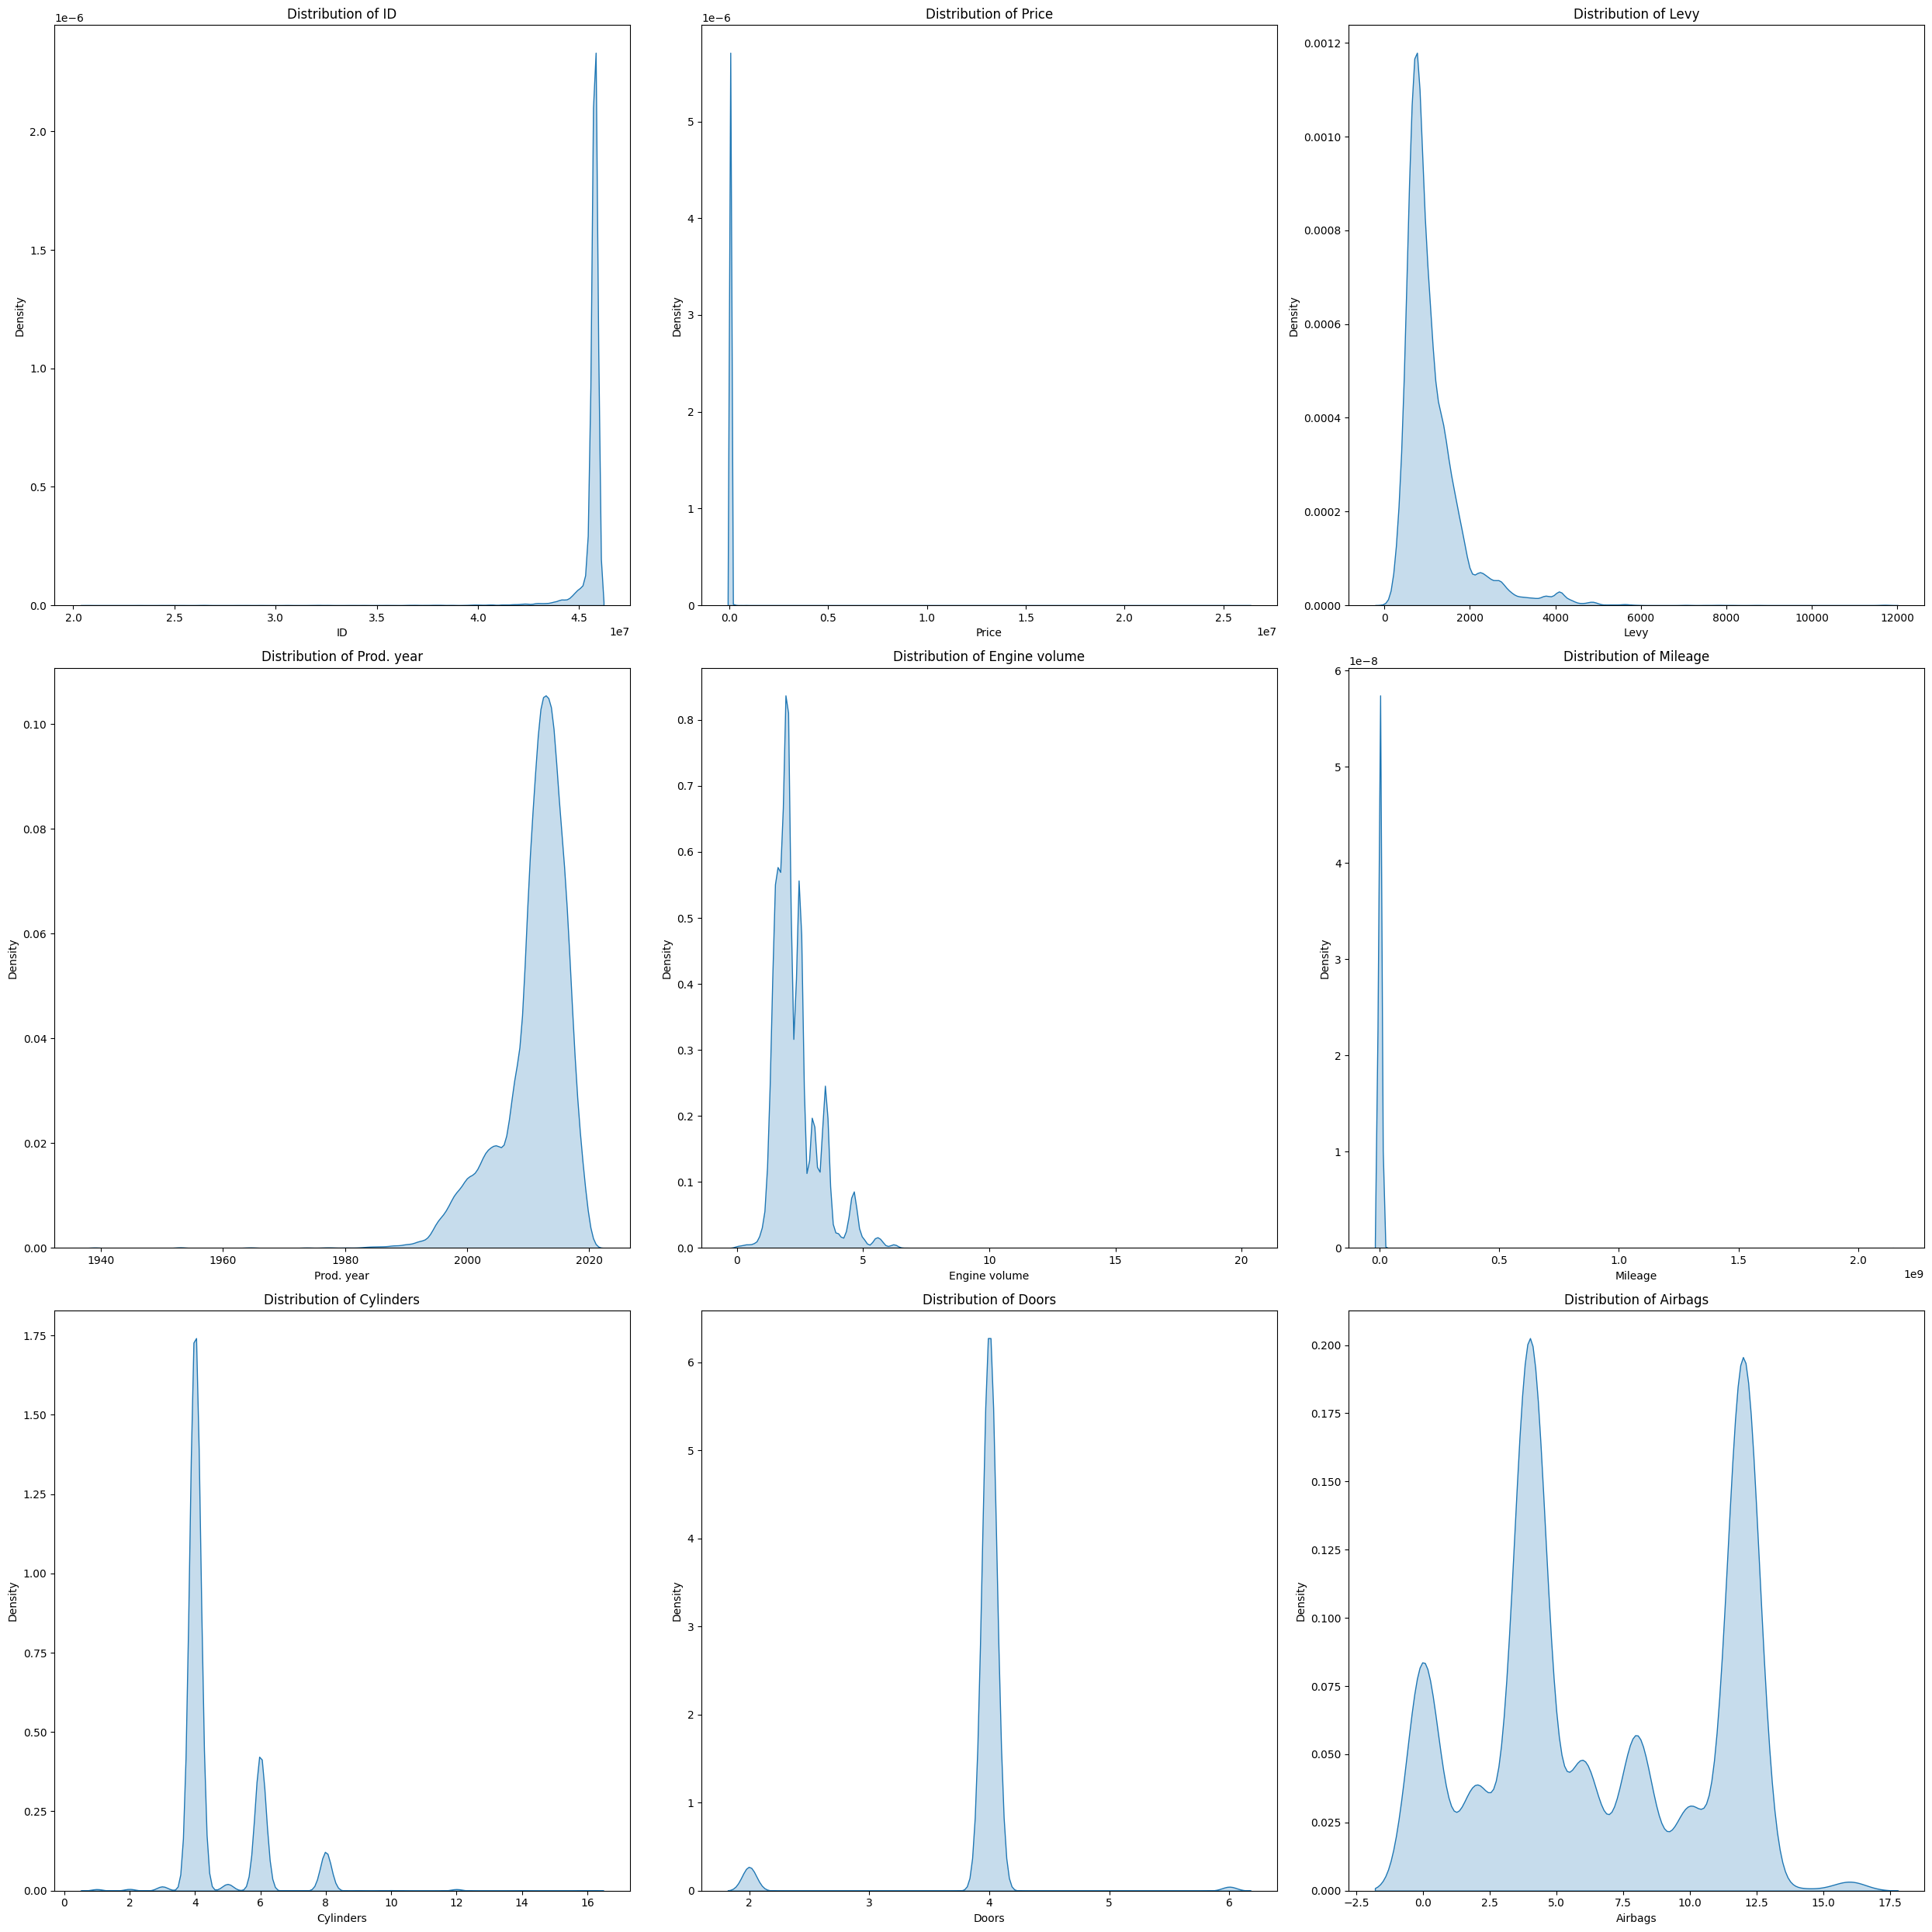

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,25))
axes = axes.flatten()

for i,cols in enumerate(numerical_col):
  sns.kdeplot(data=df, x=cols, ax=axes[i], fill=True).set_title(f'Distribution of {cols}')

plt.tight_layout()
plt.show()

###Correlation of numerical columns

In [ ]:
corr_matrix = df[numerical_col].corr()
corr_matrix

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags
ID,1.000000,-0.000844,0.019424,0.071352,-0.012232,0.004157,-0.039319,0.021754,-0.020527
Price,-0.000844,1.000000,0.002595,0.012982,0.008753,-0.001758,0.007518,-0.030869,-0.012824
Levy,0.019424,0.002595,1.000000,-0.569766,0.467329,0.028078,0.477548,-0.086854,-0.060496
Prod. year,0.071352,0.012982,-0.569766,1.000000,-0.030906,-0.063501,-0.096797,0.176701,0.236969
Engine volume,-0.012232,0.008753,0.467329,-0.030906,1.000000,-0.006289,0.778524,-0.012801,0.224441
Mileage,0.004157,-0.001758,0.028078,-0.063501,-0.006289,1.000000,-0.001768,-0.006337,-0.009201
Cylinders,-0.039319,0.007518,0.477548,-0.096797,0.778524,-0.001768,1.000000,-0.028235,0.176868
Doors,0.021754,-0.030869,-0.086854,0.176701,-0.012801,-0.006337,-0.028235,1.000000,0.046003
Airbags,-0.020527,-0.012824,-0.060496,0.236969,0.224441,-0.009201,0.176868,0.046003,1.000000


### Correlation between the columns with Headmap

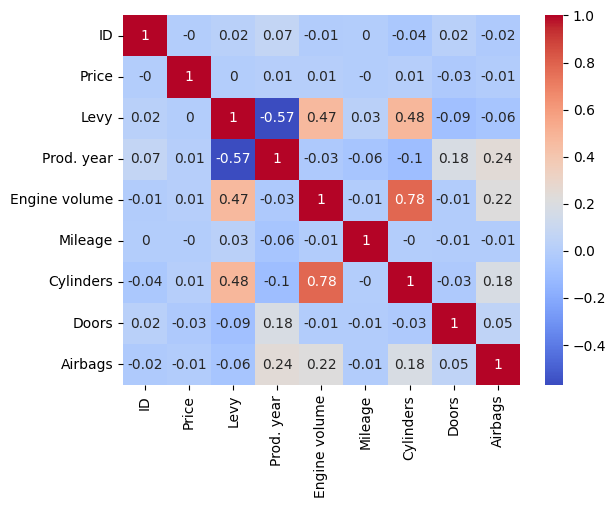

In [ ]:
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm')
plt.show()

###Distribution of Engine volume with Cylinders in Category

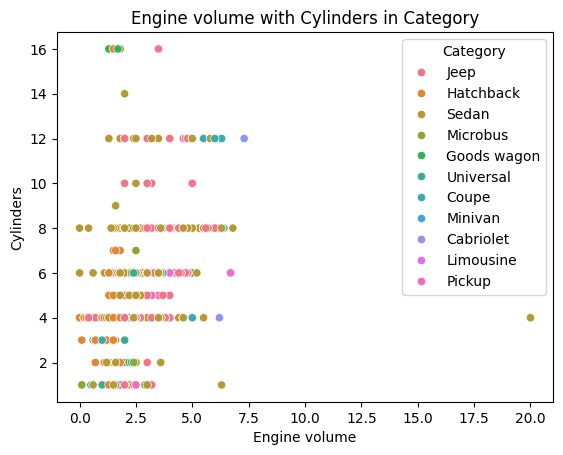

In [ ]:
sns.scatterplot(data=df, x='Engine volume', y='Cylinders', hue='Category')
plt.title('Engine volume with Cylinders in Category')
plt.show()

###Distribution of Levy over peroid of Year with Gear box type

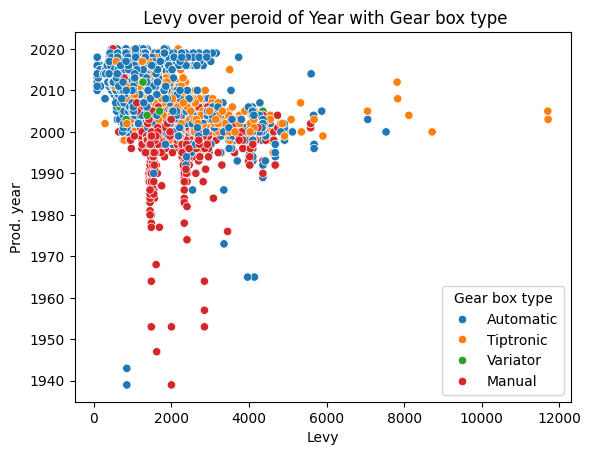

In [ ]:
sns.scatterplot(data=df, x='Levy', y='Prod. year', hue='Gear box type')
plt.title(' Levy over peroid of Year with Gear box type')
plt.show()

###Relationship of Levy with Cylinders and Wheel

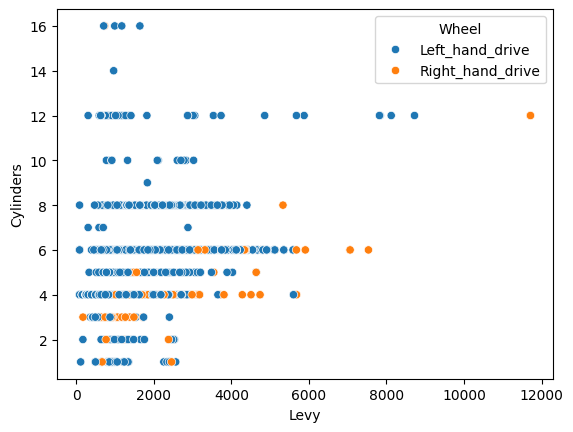

In [ ]:
sns.scatterplot(data=df, x='Levy', y='Cylinders', hue='Wheel')
plt.title('')
plt.show()

###Distribution of Categorical column

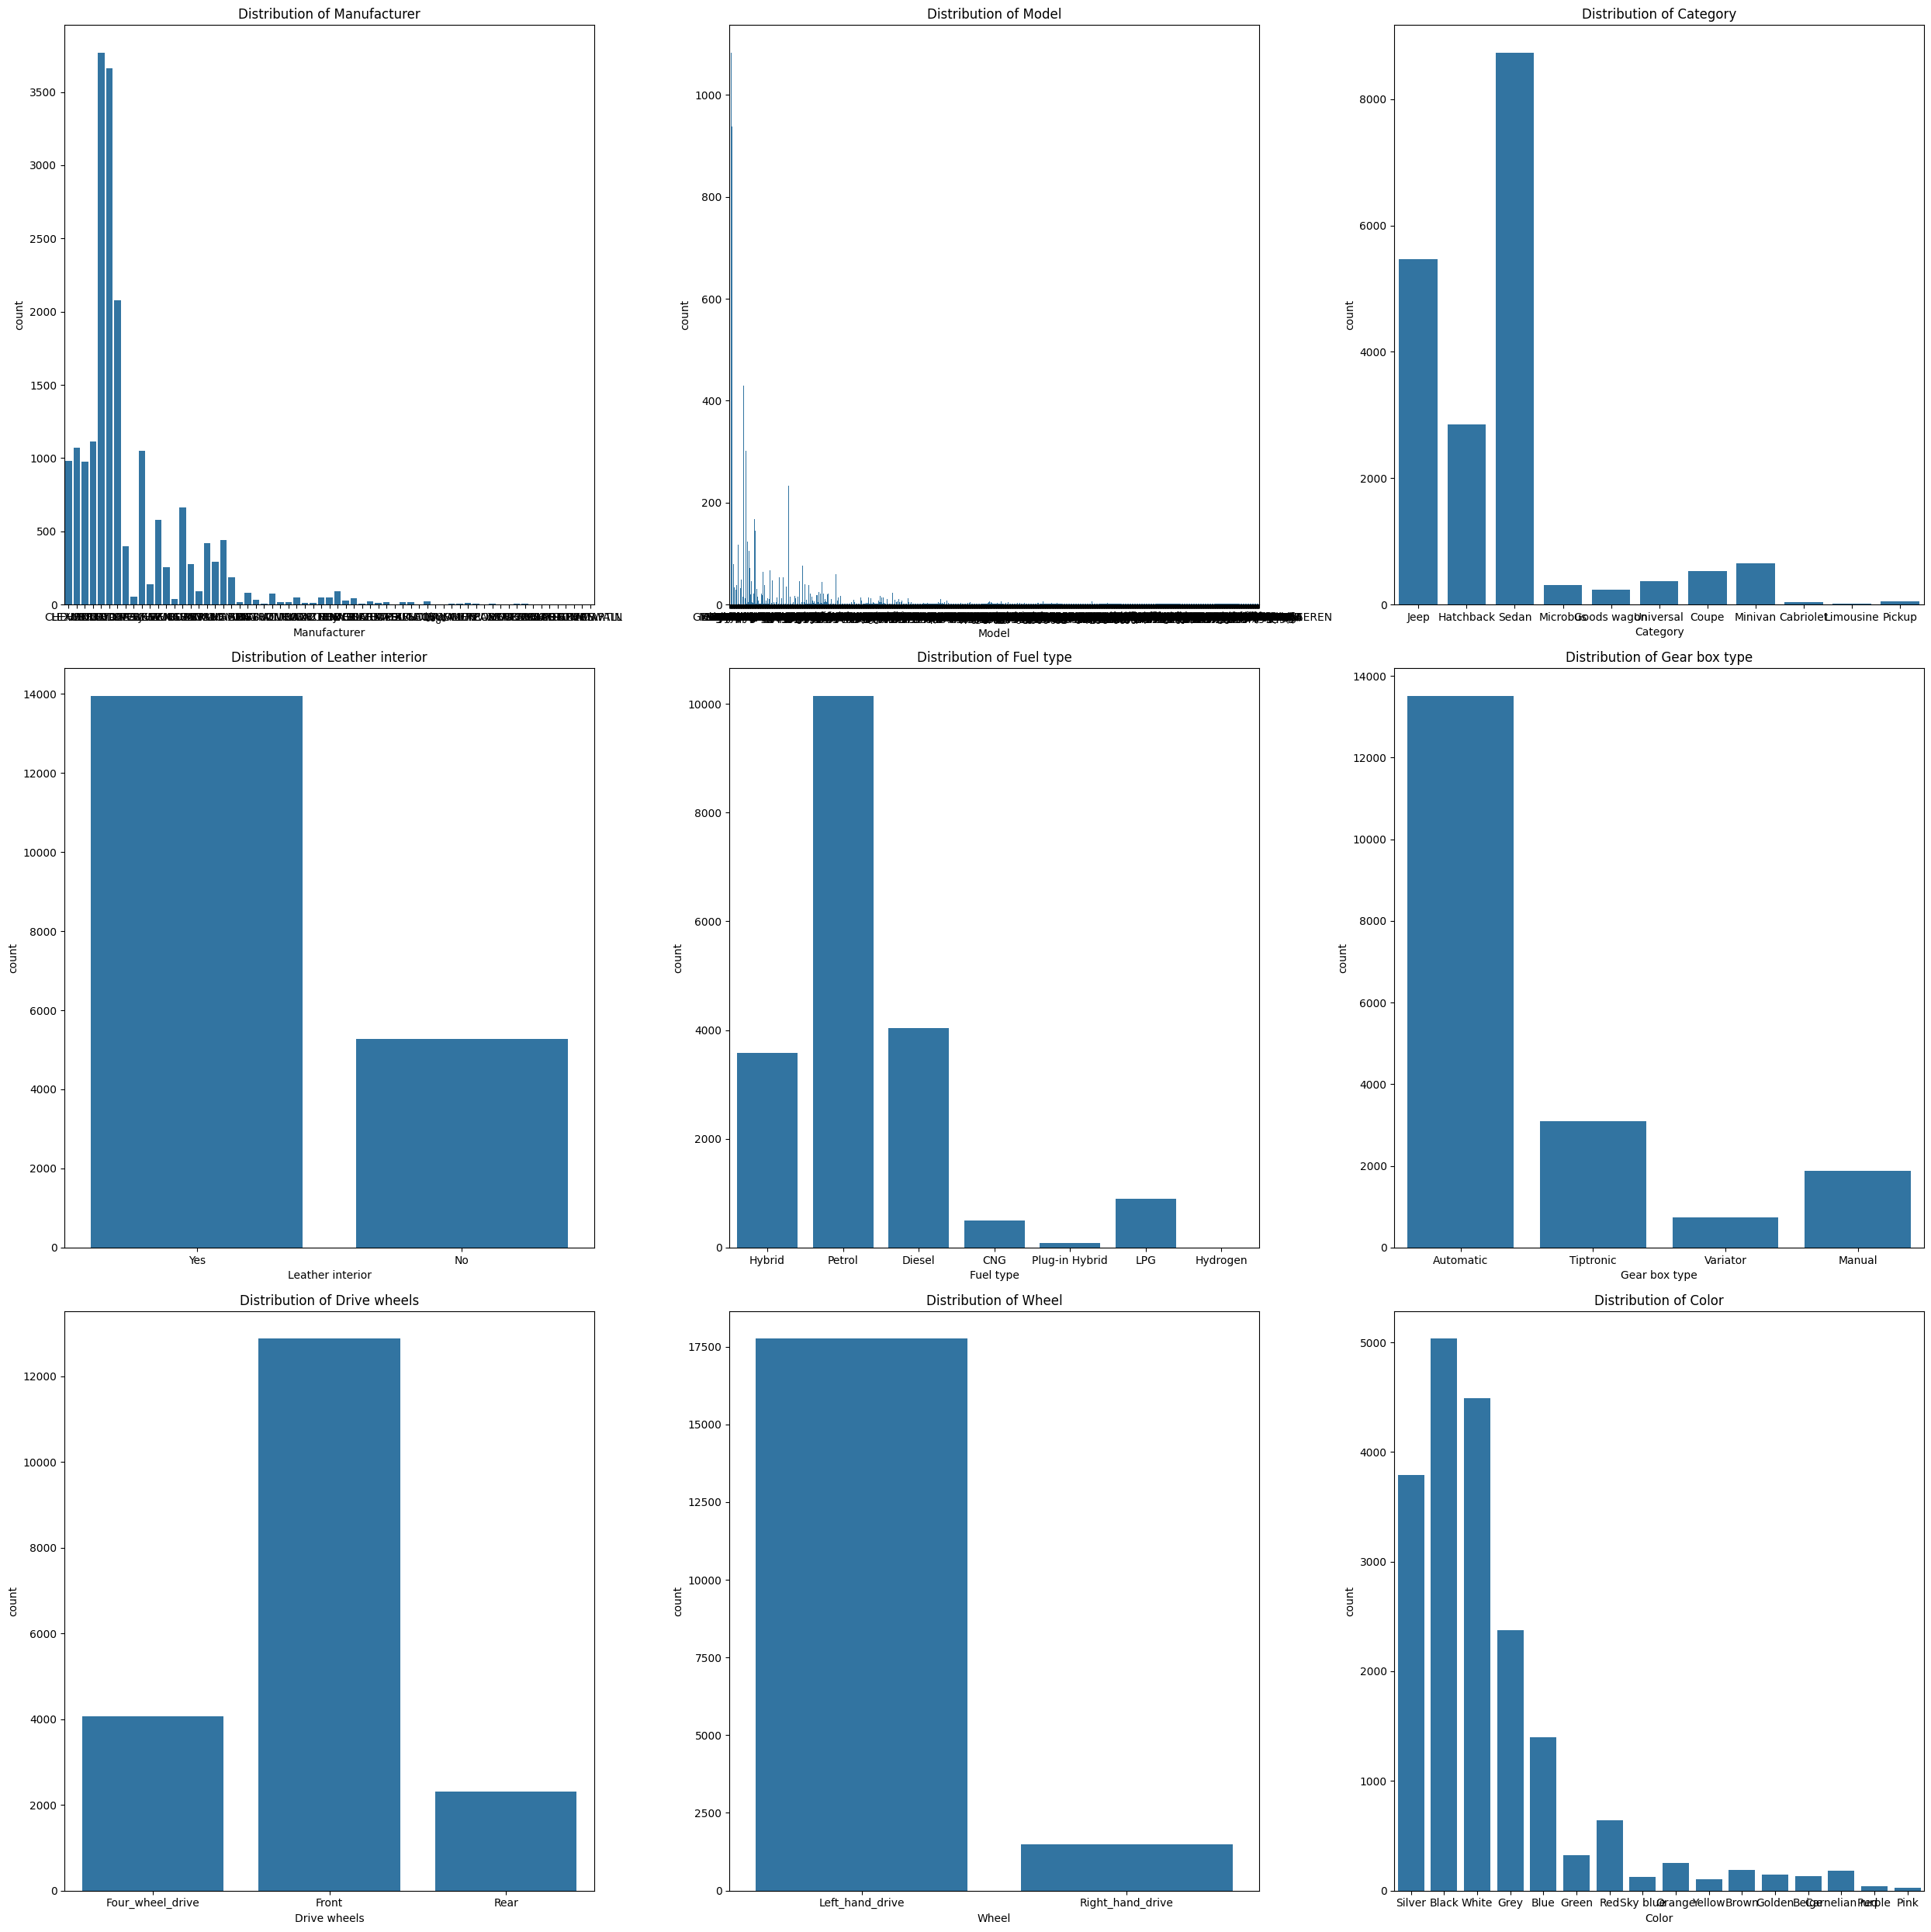

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,25))
axes = axes.flatten()

for i, cols in enumerate(categorical_col):
  sns.countplot(data=df, x=cols, ax=axes[i]).set_title(f'Distribution of {cols}')
  # for container in axes[i].containers:
  #   axes[i].bar_label(container)

plt.tight_layout()
plt.show()

###Distribution of price over Fuel

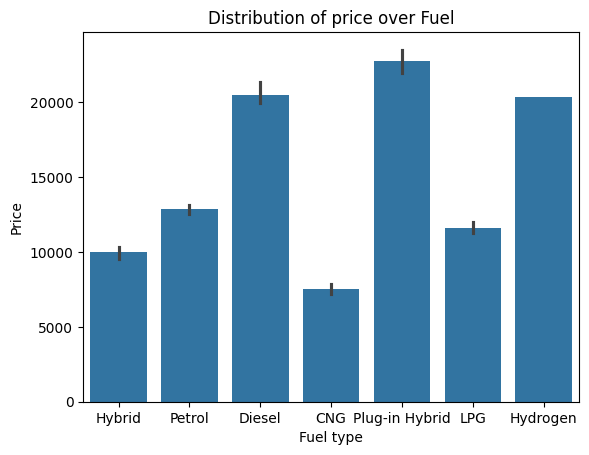

In [ ]:
sns.barplot(data=df, x='Fuel type', y='Price', estimator='median')
plt.title('Distribution of price over Fuel')
plt.show()

###Distribution of Price through color of the Car

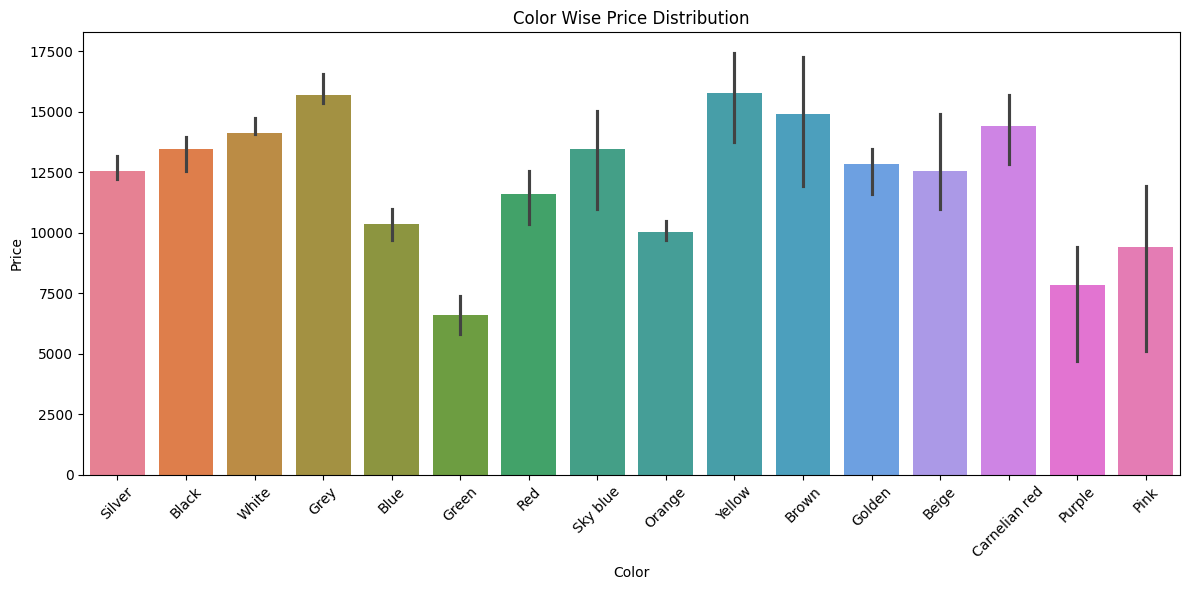

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Color', y='Price', estimator='median',hue='Color')
plt.title('Color Wise Price Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Average Distribution of Price towards Category

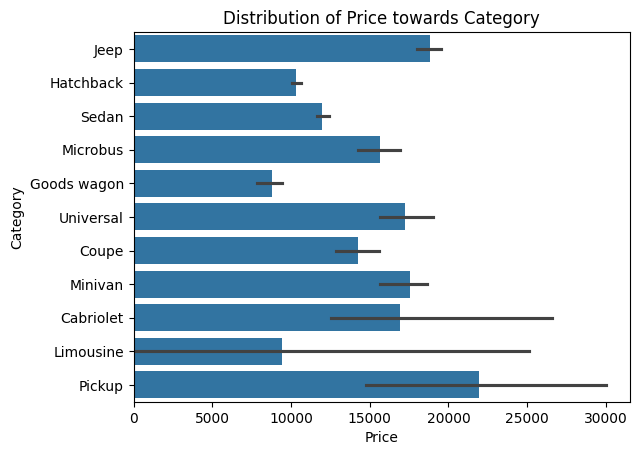

In [ ]:
# plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Price', y='Category', estimator='median')
plt.title('Distribution of Price towards Category')
plt.show()

##Outliers in the Numerical columns

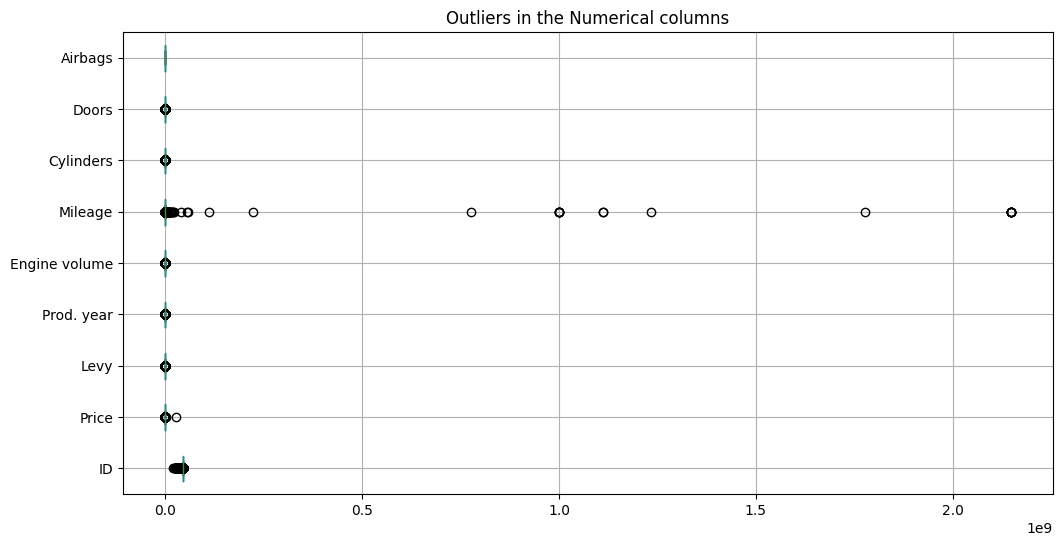

In [ ]:
df.boxplot(vert=False, figsize=(12,6))
plt.title('Outliers in the Numerical columns')
plt.show()

##Skewness in the columns:


In [ ]:
df[numerical_col].skew()

,0
ID,-11.868235
Price,136.470427
Levy,2.925589
Prod. year,-2.082261
Engine volume,2.186242
Mileage,38.896821
Cylinders,2.091083
Doors,-2.953955
Airbags,0.082012


##Log Transformation

Here i'm not including **Prod.year** column- its not meaningful to apply log or IQR method in year column and **Airbags** column - Almost symmetrical no transformation needed.

In [ ]:
cols_to_log=['Price','Levy','Engine volume','Mileage','Cylinders','ID','Doors']
df[cols_to_log]=df[cols_to_log].apply(lambda x:np.log1p(x))

####After Log transformation Skewness

In [ ]:
df[cols_to_log].skew()

,0
Price,-1.375741
Levy,0.534101
Engine volume,0.625517
Mileage,-3.635731
Cylinders,1.154346
ID,-14.723595
Doors,-3.942305


##Showing the Outliers in the Boxplot

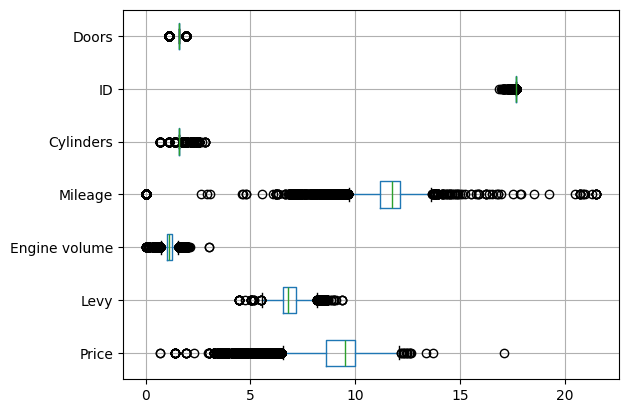

In [ ]:
df[cols_to_log].boxplot(vert=False)
plt.show()

##Removing Extreme outliers using IQR method

In [ ]:
for column in cols_to_log:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 0.75 * IQR
  upper_bound = Q3 + 0.75 * IQR

  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
df.shape

(7403, 18)

####After removing outliers viewing the boxplot

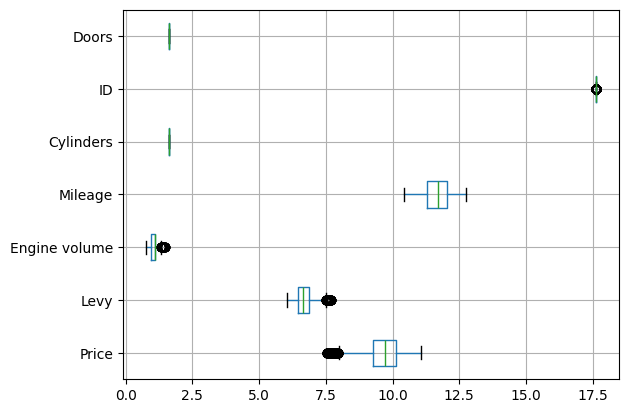

In [ ]:
df[cols_to_log].boxplot(vert=False)
plt.show()

After removing outliers using IQR method there is four columns have outliers **ID, Engine volume, Levy, Price**.But i'm leaving the ID column,because it doesn't carry real-world meaning or patterns.



###skewness are very much reduced.

In [ ]:
df[cols_to_log].skew()

,0
Price,-0.567272
Levy,0.662384
Engine volume,0.053558
Mileage,-0.249564
Cylinders,0.000000
ID,-1.107394
Doors,0.000000


##still have some outliers in **Price,Levy,Engine volume** columns.

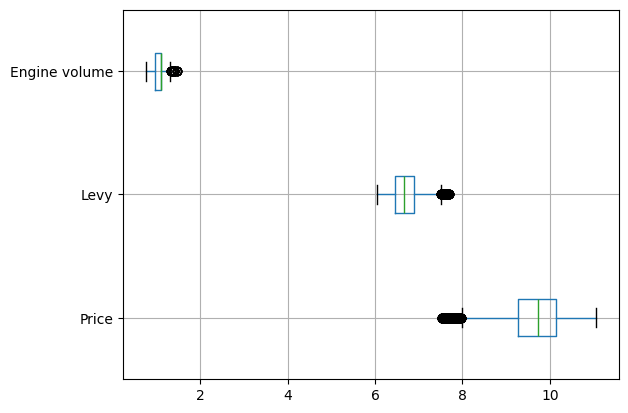

In [ ]:
df[['Price','Levy','Engine volume']].boxplot(vert=False)
plt.show()

##Applying quantile clipping method

In [ ]:
def quantile_clip(df, col, lower=0.01, upper=0.99):
    q_low = df[col].quantile(lower)
    q_high = df[col].quantile(upper)
    return df[df[col].between(q_low, q_high)]

# Apply with custom ranges
df = quantile_clip(df, 'Price', 0.01, 0.99)
df = quantile_clip(df, 'Levy', 0.01, 0.99)
df = quantile_clip(df, 'Engine volume', 0.005, 0.995)


In [ ]:
df.shape

(7038, 18)

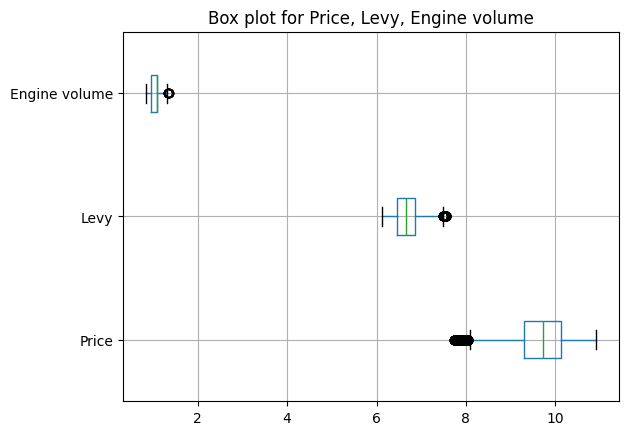

In [ ]:
df[['Price','Levy','Engine volume']].boxplot(vert=False)
plt.title('Box plot for Price, Levy, Engine volume')
plt.show()

###Viewing the skewness - skewness was come under moderate level.

In [ ]:
df[['Price','Levy','Engine volume']].skew()

,0
Price,-0.527304
Levy,0.658168
Engine volume,0.043998


## Applying **Winsorization Method** for Price, Levy and Engine volume columns

In [ ]:
from scipy.stats.mstats import winsorize

df['Price'] = winsorize(df['Price'], limits=[0.03, 0.02])
df['Levy'] = winsorize(df['Levy'], limits=[0.02, 0.02])
df['Engine volume'] = winsorize(df['Engine volume'], limits=[0.01, 0.01])

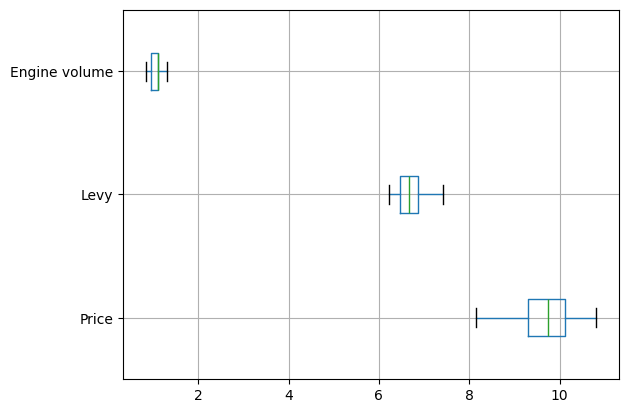

In [ ]:
df[['Price','Levy','Engine volume']].boxplot(vert=False)
plt.show()

###All numerical columns after removing the outliers

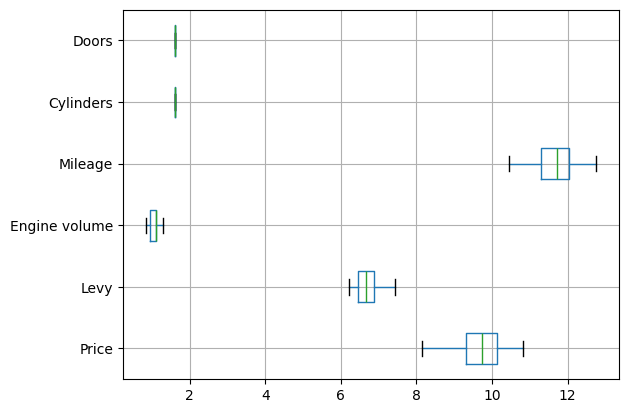

In [ ]:
cols_to_log.remove('ID')
df[cols_to_log].boxplot(vert=False)
plt.show()

###Using Capping(Mapping) Method for removing outliers in **Airbags** columns

In [ ]:
df['Airbags'] = df['Airbags'].clip(upper=14)

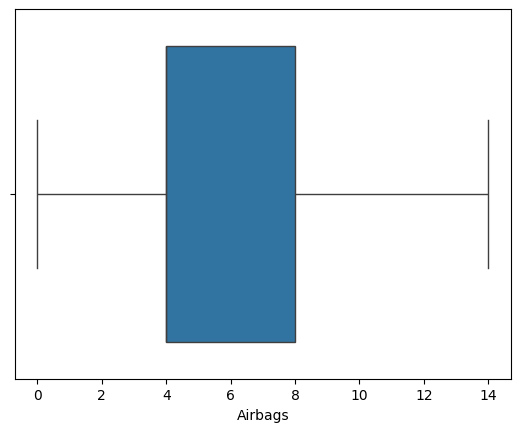

In [ ]:
sns.boxplot(data=df,x='Airbags')
plt.show()

In [ ]:
df.shape

(7038, 18)

###"Outlier removal was performed using the IQR method with a 0.75 threshold and further refined with quantile clipping (e.g.0.01 and 99th percentiles).After that Winsorization Method(capping method) was used and eliminated the majority of outliers.

###Hist plot for Price

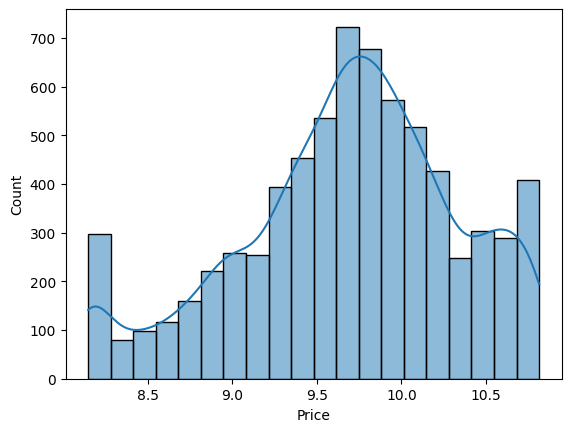

In [ ]:
sns.histplot(data=df, x='Price', bins=20, kde=True)
plt.show()

###Kde plot for all the numerical column after removing outliers and skewness

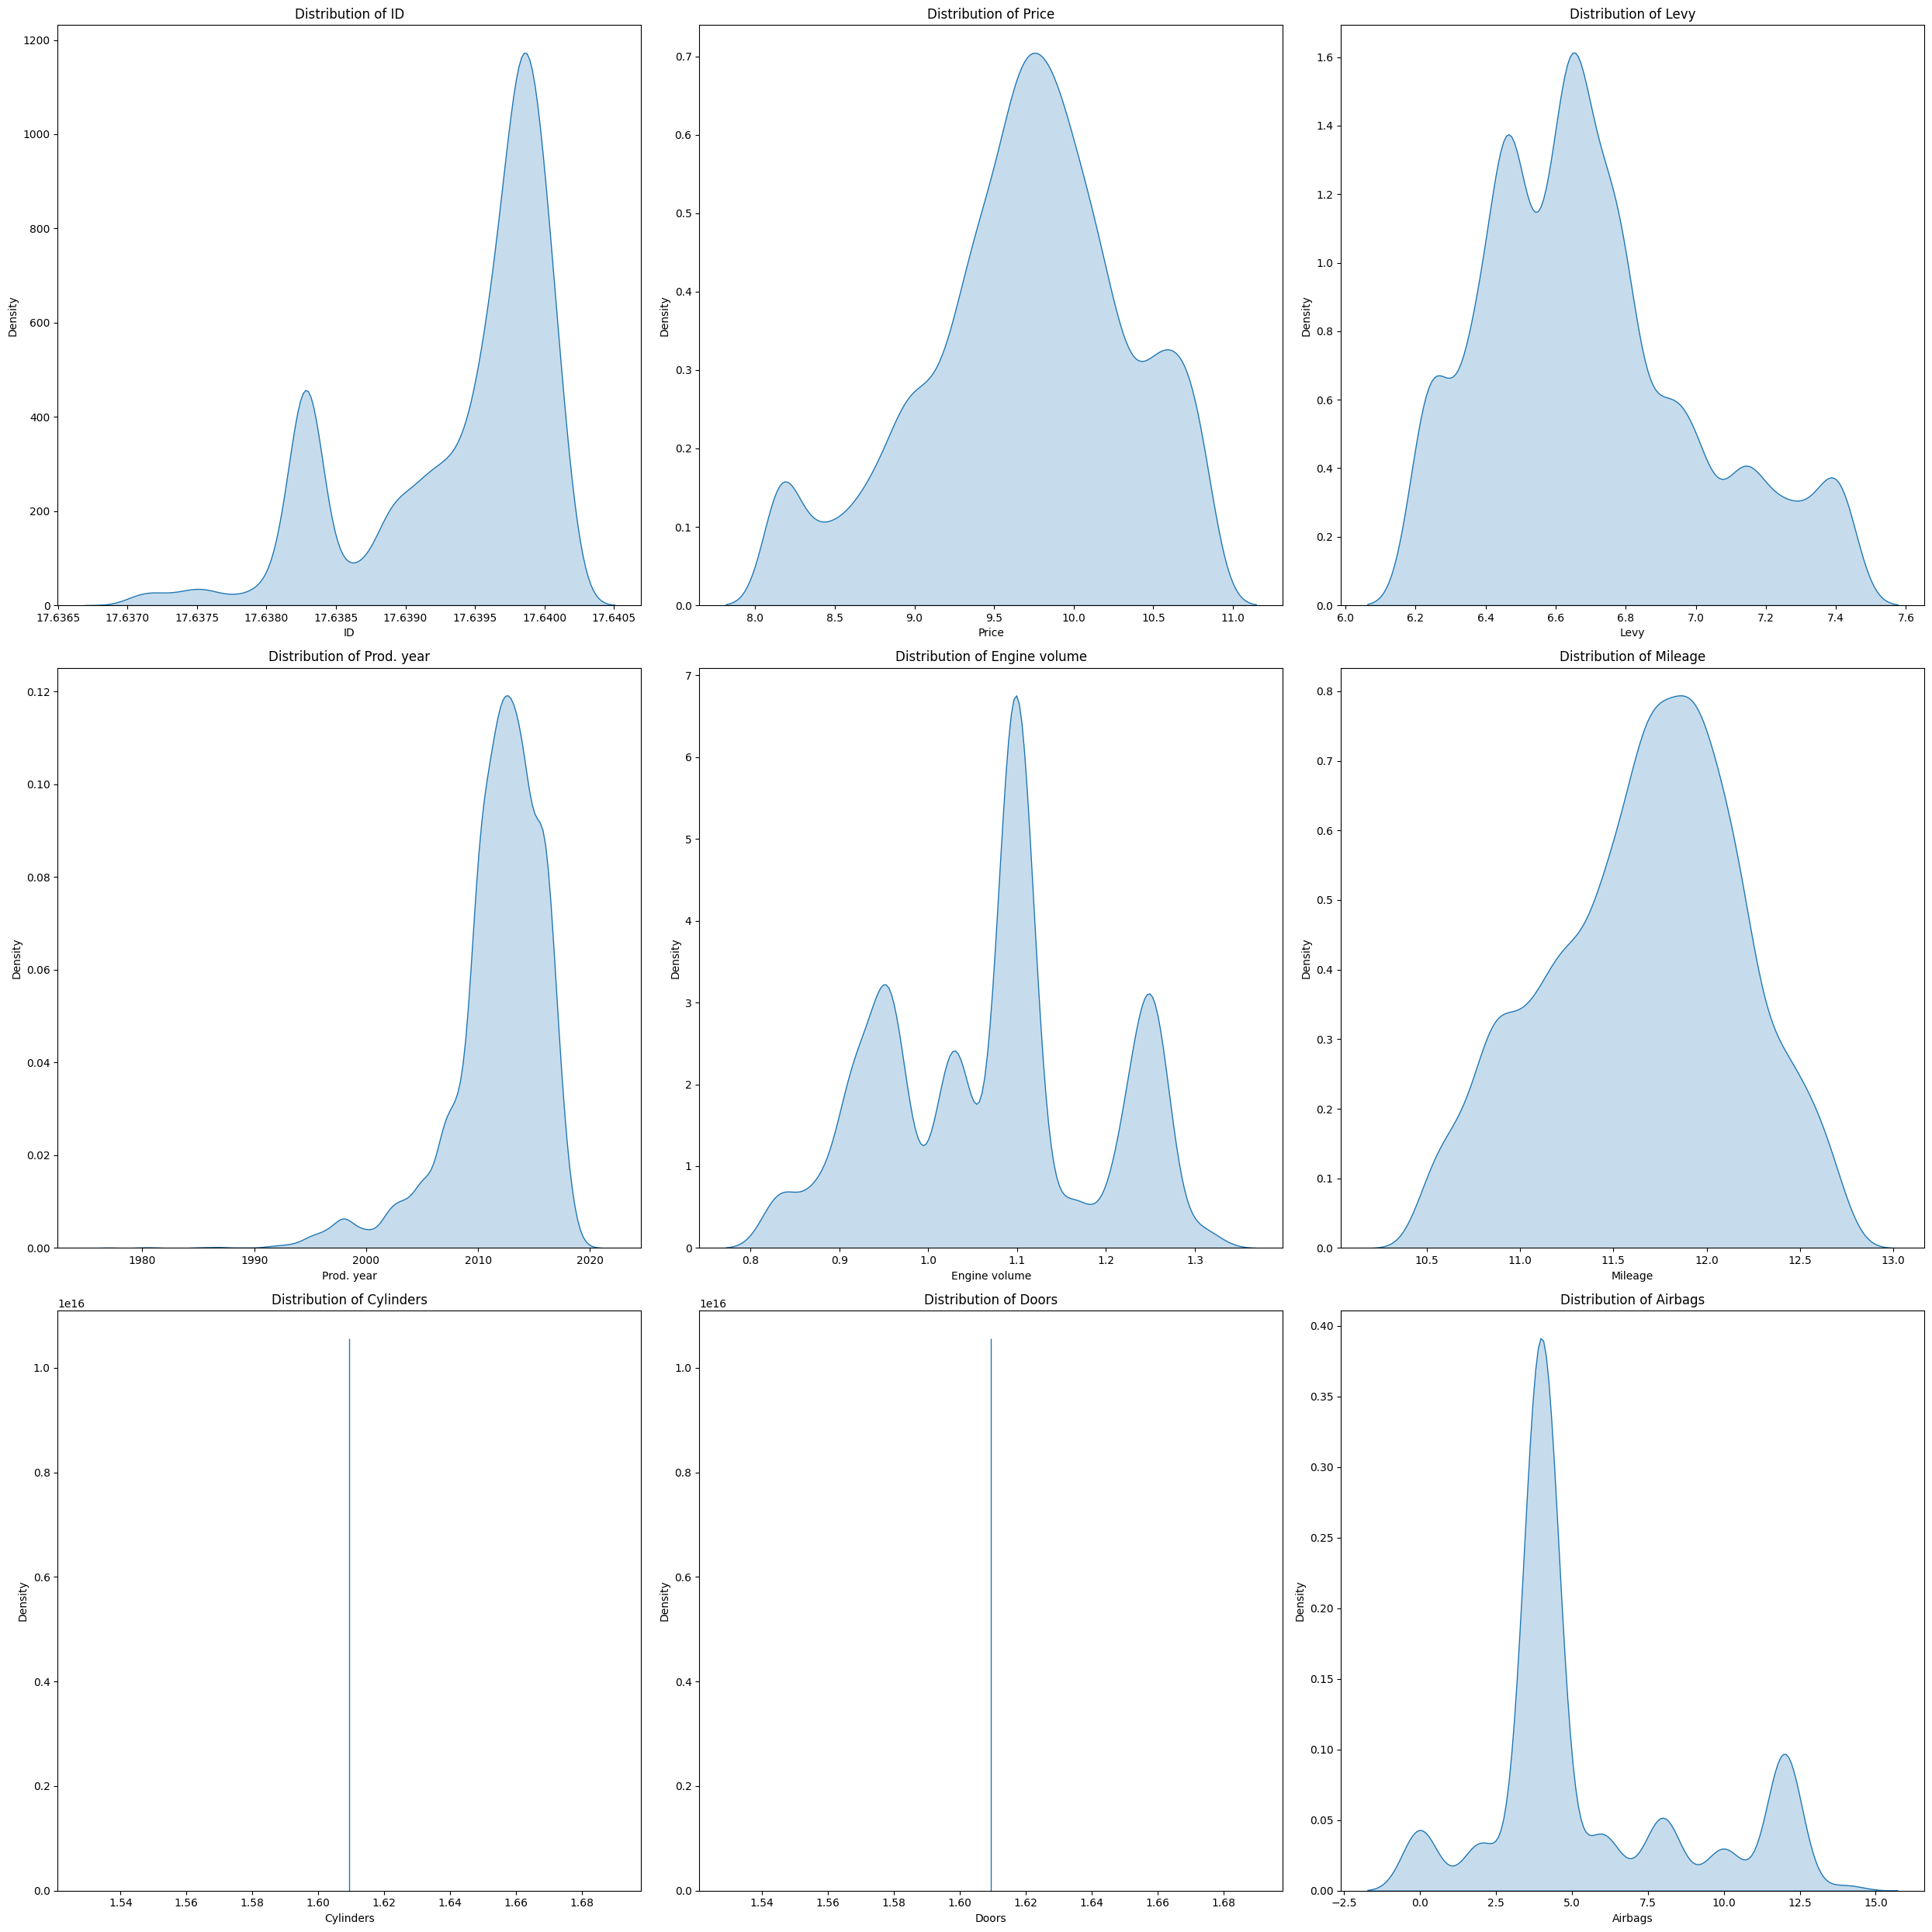

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,25))
axes = axes.flatten()

for i,cols in enumerate(numerical_col):
  sns.kdeplot(data=df, x=cols, ax=axes[i], fill=True).set_title(f'Distribution of {cols}')

plt.tight_layout()
plt.show()

##Checking the Duplicates

In [ ]:
df.duplicated().sum()

np.int64(129)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

###After removing outliers and duplicate data's remaining shape of data

In [ ]:
df.shape

(6909, 18)

##Data Transformation : Feature Engineering

##Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = {}

for column in categorical_col:
  le = LabelEncoder()
  df[column] = le.fit_transform(df[column])
  label_encoder[column] = le

In [ ]:
# Inverse (back to original)
#df[cols_to_log] = df[cols_to_log].apply(np.expm1)

In [ ]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,17.639236,9.044050,7.006876,14,226,2006.0,2,0,4,0.832909,12.206078,1.609438,3,1,1.609438,1,1,2.0
3,17.639122,8.190909,6.760415,12,217,2011.0,3,1,2,1.252763,12.037459,1.609438,0,0,1.609438,0,14,0.0
5,17.639858,10.583904,6.793466,15,437,2016.0,3,1,1,1.098612,11.988737,1.609438,0,1,1.609438,0,14,4.0
16,17.639189,8.946896,6.698268,15,203,2016.0,7,1,4,1.029619,11.710472,1.609438,0,1,1.609438,0,2,12.0
17,17.639734,10.253546,6.698268,15,203,2016.0,7,1,4,1.029619,10.902611,1.609438,0,1,1.609438,0,14,4.0


##Feature Selection

In [ ]:
X = df.drop(columns=['ID','Price'], axis=1)
Y = df['Price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

###Applying Standard Scaler for X_train and X_test

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_col = [col for col in numerical_col if col not in ['Prod. year','ID','Price']]

X_train[numeric_col] = scaler.fit_transform(X_train[numeric_col])
X_test[numeric_col] = scaler.transform(X_test[numeric_col])

In [ ]:
X_train.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
10904,-0.779570,15,203,2014.0,2,0,4,0.245101,-0.113284,4.440892e-16,2,1,4.440892e-16,0,14,0.142848
14454,-1.566773,14,226,2013.0,2,1,2,-1.298958,-0.454265,4.440892e-16,0,1,4.440892e-16,0,14,-0.445930
12310,0.197404,15,281,2011.0,5,1,1,1.550584,-1.516418,4.440892e-16,0,1,4.440892e-16,0,12,-0.445930
12545,1.121431,36,135,2009.0,7,0,2,1.305092,1.962200,4.440892e-16,0,1,4.440892e-16,0,12,0.142848
10404,2.259549,22,98,1997.0,7,0,4,-0.339191,1.912992,4.440892e-16,1,2,4.440892e-16,0,12,0.142848


##Model Building with Multiple models

Here i'am using some Regression type Supervised Machine Learning Algorithms:

*  Linear Regression
*  Decision Tree Regression
*  Random Forest Regressor
*  Support Vector Regression
*  K-Nearest Neighbors Regressor
*  XGBoost Regressor

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# creating Dictionary of regression models

regression_models = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree Regressor' : DecisionTreeRegressor(max_depth=7),
    'Random Forest Regressor' : RandomForestRegressor(),
    'Support Vector Machine' : SVR(),
    'KNeighbors Regressor' : KNeighborsRegressor(n_neighbors=9),
    'XGBoost' : XGBRegressor()
}

##Model Evaluation

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error,root_mean_squared_error

# Initialize a dictionary to store the results
results = {}

# Iterate through the regression models
for name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

# Calculate R² score ,Mean Absolute Error and RootMeanSquaredError
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)

# Store the results
    results[name] = {'R²': r2, 'MeanAbsoluteError': mae, 'RootMeanSquaredError' :rmse}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df

,R²,MeanAbsoluteError,RootMeanSquaredError
Linear Regression,0.412777,0.377972,0.489898
Decision Tree Regressor,0.626002,0.275358,0.390966
Random Forest Regressor,0.800853,0.188299,0.285293
Support Vector Machine,0.046619,0.495043,0.624219
KNeighbors Regressor,0.610379,0.267186,0.399048
XGBoost,0.802901,0.194264,0.283822


####Among the various regression models tested, both **XGBoost** and **Random Forest Regressor** demonstrated superior performance in terms of R² and Mean Absolute Error, making them the most suitable choices for predicting car prices in this dataset.

##Hyperparameter Tuning using RandomizedSearchCV for Random Forest

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': np.arange(100, 501, 50),
    'max_depth': [None] + list(np.arange(5, 31, 5)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # number of combinations to try
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': np.int64(450), 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': np.int64(25), 'bootstrap': False}
Best CV Score: 0.7846298355259523


In [ ]:
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

R²: 0.8226317775278015
MAE: 0.17875724383088124
RMSE: 0.07249094940376481


Hyperparameter Tuning using RandomizedSearchCV for Random Forest gives best **R²: 0.82263** and **MAE: 0.1787572.**

##Model Comparison



*   **Random Forest Regressor** :
            R² -  0.800853
            Mean Absolute Error  -  0.188299
            Root Mean Squared Error  -  0.285293
*   **XGBOOST** :
            R² -  0.802901
            Mean Absolute Error  -  0.194264
            Root Mean Squared Error  -  0.283822

*   **Hypertuned Random Forest Regressor** :
            R² - 0.82263177
            Mean Absolute Error  -  0.1787572
            Root Mean Squared Error  -  0.0724909

####Among the various regression models tested,Support Vector Machine showed relatively poor performance, indicating their limitations in capturing complex, non-linear relationships in the dataset.

*   **Support Vector Regressor** :
            R² -  0.046619
            Mean Absolute Error  -  0.495043
            Root Mean Squared Error  - 0.624219

##Conclusion

After evaluating multiple regression models for predicting the target variable, it is evident that ensemble methods outperformed traditional and distance-based models.
Among all, **XGBoost Regressor** achieved the best overall performance with an R² score of 0.8029, MAE of 0.194, and the lowest RMSE of 0.2838, closely followed by the **Random Forest Regressor**.


On the other hand, Linear Regression and Support Vector Machine showed relatively poor performance, indicating their limitations in capturing complex, non-linear relationships in the dataset.

<!-- Therefore, XGBoost is recommended as the most reliable model for this regression task, offering the best balance between accuracy and error minimization. -->

Hyperparameter tuning of the Random Forest using **RandomizedSearchCV** improved the **R² score** from 0.800 to 0.822, reduced MAE, and lowered RMSE, indicating better model fit and prediction accuracy. The tuned Random Forest model outperformed all other tested models, making it the most suitable choice for this problem.
